# Función transferencia pasabanda de segundo orden
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presenta un ejemplo de **análisis numérico y circuital** para un filtro pasabajo simple de segundo orden. También se aprovecha el mismo circuito para ejemplificar respecto a las funciones para el análisis de la respuesta en frecuencia:

* [analyze_sys](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.analyze_sys)
* [bodePlot](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.bodePlot)
* [pzmap](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pzmap)
* [pretty_print_bicuad_omegayq](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pretty_print_bicuad_omegayq)

De presentación algebraica

* [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex)
* [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)


y las funciones para el dibujo de redes:

* [dibujar_elemento_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_derivacion)
* [dibujar_puerto_entrada](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_entrada)
* [dibujar_espacio_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_espacio_derivacion)
* [dibujar_elemento_serie](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_serie)
* [dibujar_puerto_salida](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_salida)


### Introducción

Comencemos con un ejemplo simple: un pasabajos de 2do orden pasivo como seguramente habrás visto en TC1:

![lpf_pasivo.png](lpf_pasivo.png)

To find the frequencies $ w_1 $ and $ w_2 $ for which $|T(jw)| = \sqrt{2}/2$, we first need to evaluate the transfer function $ T(s) $ at $ s = jw $:

Given the transfer function:

$$ T(s) = \frac{s \cdot w_0 / Q}{s^2 + s \cdot w_0 / Q + w_0^2} $$

We substitute $ s = jw $:

$$ T(jw) = \frac{jw \cdot w_0 / Q}{(jw)^2 + jw \cdot w_0 / Q + w_0^2} $$

Simplify the expression:

$$ T(jw) = \frac{jw \cdot w_0 / Q}{-w^2 + jw \cdot w_0 / Q + w_0^2} $$

Next, we need to find the magnitude of $ T(jw) $:

$$ |T(jw)| = \left| \frac{jw \cdot w_0 / Q}{-w^2 + jw \cdot w_0 / Q + w_0^2} \right| $$

The magnitude of a complex fraction $ \frac{A}{B} $ is $ \frac{|A|}{|B|} $:

$$ |T(jw)| = \frac{|jw \cdot w_0 / Q|}{|-w^2 + jw \cdot w_0 / Q + w_0^2|} $$

Calculate the magnitude of the numerator:

$$ |jw \cdot w_0 / Q| = \frac{w \cdot w_0}{Q} $$

Now, calculate the magnitude of the denominator. The denominator is a complex number:

$$ -w^2 + jw \cdot w_0 / Q + w_0^2 $$

The magnitude of a complex number $ a + jb $ is $ \sqrt{a^2 + b^2} $:

Let $ a = -w^2 + w_0^2 $ and $ b = \frac{w \cdot w_0}{Q} $:

$$ |-w^2 + jw \cdot w_0 / Q + w_0^2| = \sqrt{(-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2} $$

So,

$$ |T(jw)| = \frac{w \cdot w_0 / Q}{\sqrt{(-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2}} $$

We set this equal to $ \sqrt{2}/2 $:

$$ \frac{w \cdot w_0 / Q}{\sqrt{(-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2}} = \frac{\sqrt{2}}{2} $$

**Solution By Steps**

**Step 1: Square both sides to remove the square root**

$$ \left( \frac{w \cdot w_0 / Q}{\sqrt{(-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2}} \right)^2 = \left( \frac{\sqrt{2}}{2} \right)^2 $$

$$ \frac{(w \cdot w_0 / Q)^2}{(-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2} = \frac{1}{2} $$

**Step 2: Multiply both sides by the denominator**

$$ 2 \cdot (w \cdot w_0 / Q)^2 = (-w^2 + w_0^2)^2 + \left(\frac{w \cdot w_0}{Q}\right)^2 $$

**Step 3: Expand and simplify**

$$ 2 \cdot \frac{w^2 \cdot w_0^2}{Q^2} = (-w^2 + w_0^2)^2 + \frac{w^2 \cdot w_0^2}{Q^2} $$

Subtract $ \frac{w^2 \cdot w_0^2}{Q^2} $ from both sides:

$$ 2 \cdot \frac{w^2 \cdot w_0^2}{Q^2} - \frac{w^2 \cdot w_0^2}{Q^2} = (-w^2 + w_0^2)^2 $$

$$ \frac{w^2 \cdot w_0^2}{Q^2} = (-w^2 + w_0^2)^2 $$

**Step 4: Expand the right-hand side**

$$ \frac{w^2 \cdot w_0^2}{Q^2} = w^4 - 2w^2w_0^2 + w_0^4 $$

**Step 5: Form a quadratic equation in $ w^2 $**

$$ \frac{w^2 \cdot w_0^2}{Q^2} = w^4 - 2w^2w_0^2 + w_0^4 $$

$$ 0 = w^4 - 2w^2w_0^2 + w_0^4 - \frac{w^2 \cdot w_0^2}{Q^2} $$

$$ 0 = w^4 - \left(2w_0^2 + \frac{w_0^2}{Q^2}\right) w^2 + w_0^4 $$

Let $ x = w^2 $, the quadratic equation becomes:

$$ 0 = x^2 - \left(2w_0^2 + \frac{w_0^2}{Q^2}\right)x + w_0^4 $$

**Step 6: Solve the quadratic equation for $ x $**

Using the quadratic formula $ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $:

Here, $ a = 1 $, $ b = -(2w_0^2 + \frac{w_0^2}{Q^2}) $, and $ c = w_0^4 $:

$$ x = \frac{(2w_0^2 + \frac{w_0^2}{Q^2}) \pm \sqrt{\left(2w_0^2 + \frac{w_0^2}{Q^2}\right)^2 - 4 \cdot w_0^4}}{2} $$

$$ x = \frac{2w_0^2 + \frac{w_0^2}{Q^2} \pm \sqrt{4w_0^4 + 4w_0^4 \cdot \frac{1}{Q^2} + \frac{w_0^4}{Q^4} - 4w_0^4}}{2} $$

$$ x = \frac{2w_0^2 + \frac{w_0^2}{Q^2} \pm \sqrt{4w_0^4 \cdot \frac{1}{Q^2} + \frac{w_0^4}{Q^4}}}{2} $$

$$ x = \frac{2w_0^2 + \frac{w_0^2}{Q^2} \pm w_0^2 \sqrt{\frac{4}{Q^2} + \frac{1}{Q^4}}}{2} $$

$$ x = \frac{2w_0^2 + \frac{w_0^2}{Q^2} \pm w_0^2 \sqrt{\frac{4Q^2 + 1}{Q^4}}}{2} $$

$$ x = \frac{2w_0^2 + \frac{w_0^2}{Q^2} \pm w_0^2 \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$

$$ x = w_0^2 \cdot \frac{2 + \frac{1}{Q^2} \pm \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$

**Step 7: Find $ w_1 $ and $ w_2 $ by taking the square root of $ x $**

Let $ x_1 $ and $ x_2 $ be the two solutions:

$$ x_1 = w_0^2 \cdot \frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$

$$ x_2 = w_0^2 \cdot \frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$

Then,

$$ w_1 = \sqrt{x_1} $$
$$ w_2 = \sqrt{x



Given the values for $ w_1 $ and $ w_2 $:

$$ w_1 = \sqrt{x_1} = \sqrt{w_0^2 \cdot \frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$
$$ w_2 = \sqrt{x_2} = \sqrt{w_0^2 \cdot \frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$

First, let's simplify these expressions:

$$ x_1 = w_0^2 \cdot \frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$
$$ x_2 = w_0^2 \cdot \frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2} $$

Therefore,

$$ w_1 = w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$
$$ w_2 = w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$

Now, let's find $ w_1 \cdot w_2 $:

**Step 1: Calculate $ w_1 \cdot w_2 $**

$$ w_1 \cdot w_2 = \left( w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) \cdot \left( w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) $$

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \cdot \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$

Since $ \sqrt{a} \cdot \sqrt{b} = \sqrt{a \cdot b} $:

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{(2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}) \cdot (2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2})}{4}} $$

Notice that $ (a + b)(a - b) = a^2 - b^2 $:

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{\left(2 + \frac{1}{Q^2}\right)^2 - \left(\frac{\sqrt{4Q^2 + 1}}{Q^2}\right)^2}{4}} $$

Simplify inside the square root:

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{4 + \frac{4}{Q^2} + \frac{1}{Q^4} - \frac{4Q^2 + 1}{Q^4}}{4}} $$

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{4 + \frac{4}{Q^2} + \frac{1}{Q^4} - \frac{4Q^2 + 1}{Q^4}}{4}} $$

Combine like terms:

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{4Q^4 + 4Q^2 - 4Q^2 - 1}{4Q^4}} $$

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{4Q^4 - 1}{4Q^4}} $$

$$ w_1 \cdot w_2 = w_0^2 \cdot \sqrt{\frac{4Q^4 - 1}{4Q^4}} $$

$$ w_1 \cdot w_2 = w_0^2 \cdot \frac{\sqrt{4Q^4 - 1}}{2Q^2} $$

**Step 2: Calculate $ w_1 - w_2 $**

$$ w_1 - w_2 = w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - w_0 \cdot \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} $$

Factor out $ w_0 $:

$$ w_1 - w_2 = w_0 \left( \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) $$

Let $ a = 2 + \frac{1}{Q^2} $ and $ b = \frac{\sqrt{4Q^2 + 1}}{Q^2} $:

$$ w_1 - w_2 = w_0 \left( \sqrt{\frac{a + b}{2}} - \sqrt{\frac{a - b}{2}} \right) $$

To simplify this expression further, note that this represents the difference between two square roots, which is not straightforward to simplify algebraically without specific values for $ Q $.

**Final Answer**

$$ w_1 \cdot w_2 = w_0^2 \cdot \frac{\sqrt{4Q^4 - 1}}{2Q^2} $$

The exact expression for $ w_1 - w_2 $ in simplified algebraic form is:

$$ w_1 - w_2 = w_0 \left( \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) $$

**Key Concept**

The key concept in this problem is solving for the frequencies at which the magnitude of a transfer function equals a specified value and understanding how to manipulate complex algebraic expressions.

**Key Concept Explanation**

Transfer functions are used to represent the relationship between the input and output of a system in the Laplace domain. When evaluating the magnitude of a transfer function at specific frequencies, it is crucial to understand how to handle complex numbers and their magnitudes. Solving for these frequencies often involves forming and solving quadratic equations, as well as simplifying complex algebraic expressions.

**Related Knowledge or Questions**

[1] Solve for the magnitude of a transfer function at a specific frequency given another type of transfer function.

[2] Explain how to find the resonant frequency of a second-order system.

[3] Discuss the significance of the poles and zeros of a transfer function in determining the system's behavior.

Great job working through this complex problem! If you'd like to explore any of these related topics or have other questions, let me know!







do reasonable approximation for Q>3/2 in \left( \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right)



To approximate the expression 

$$ \left( \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) $$

for $ Q > \frac{3}{2} $, we can use series expansion methods or asymptotic analysis for large values of $ Q $.

**Step-by-Step Approximation:**

1. **Simplify the Inner Terms:**

   For large $ Q $, $\frac{1}{Q^2}$ is small, and we can approximate $\sqrt{4Q^2 + 1} \approx 2Q$.

   Therefore, the expression simplifies to:

   $$ \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{2Q}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{2Q}{Q^2}}{2}} $$

   Simplifying further:

   $$ \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{2}{Q}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{2}{Q}}{2}} $$

2. **Expand and Simplify for Large $ Q $:**

   For large $ Q $, $\frac{1}{Q^2}$ and $\frac{2}{Q}$ are small, so we can use binomial expansion for the square root terms.

   Let’s denote:

   $$ A = 2 + \frac{1}{Q^2} $$
   $$ B = \frac{2}{Q} $$

   The expression becomes:

   $$ \sqrt{\frac{A + B}{2}} - \sqrt{\frac{A - B}{2}} $$

   For large $ Q $, we can use the first-order approximation for square roots:

   $$ \sqrt{1 + x} \approx 1 + \frac{x}{2} $$

   Therefore,

   $$ \sqrt{\frac{A + B}{2}} \approx \sqrt{\frac{A}{2}} \left(1 + \frac{B}{2A}\right) $$
   $$ \sqrt{\frac{A - B}{2}} \approx \sqrt{\frac{A}{2}} \left(1 - \frac{B}{2A}\right) $$

3. **Substitute and Simplify:**

   Using these approximations:

   $$ \sqrt{\frac{A + B}{2}} \approx \sqrt{\frac{2 + \frac{1}{Q^2}}{2}} \left(1 + \frac{\frac{2}{Q}}{2(2 + \frac{1}{Q^2})}\right) $$
   $$ \sqrt{\frac{A - B}{2}} \approx \sqrt{\frac{2 + \frac{1}{Q^2}}{2}} \left(1 - \frac{\frac{2}{Q}}{2(2 + \frac{1}{Q^2})}\right) $$

   Simplify the square root:

   $$ \sqrt{\frac{2 + \frac{1}{Q^2}}{2}} = \sqrt{1 + \frac{1}{2Q^2}} \approx 1 + \frac{1}{4Q^2} $$

   Now, combining the expressions:

   $$ \left(1 + \frac{1}{4Q^2}\right) \left(1 + \frac{\frac{2}{Q}}{2(2 + \frac{1}{Q^2})}\right) - \left(1 + \frac{1}{4Q^2}\right) \left(1 - \frac{\frac{2}{Q}}{2(2 + \frac{1}{Q^2})}\right) $$

   $$ \approx \left(1 + \frac{1}{4Q^2}\right) \left(1 + \frac{\frac{2}{Q}}{4}\right) - \left(1 + \frac{1}{4Q^2}\right) \left(1 - \frac{\frac{2}{Q}}{4}\right) $$

4. **Final Simplification:**

   $$ \approx \left(1 + \frac{1}{4Q^2}\right) \left(1 + \frac{1}{2Q}\right) - \left(1 + \frac{1}{4Q^2}\right) \left(1 - \frac{1}{2Q}\right) $$

   $$ \approx \left(1 + \frac{1}{4Q^2} + \frac{1}{2Q} + \frac{1}{8Q^3}\right) - \left(1 + \frac{1}{4Q^2} - \frac{1}{2Q} - \frac{1}{8Q^3}\right) $$

   $$ \approx \frac{1}{2Q} + \frac{1}{2Q} $$

   $$ \approx \frac{1}{Q} $$

**Reasonable Approximation:**

For $ Q > \frac{3}{2} $, the expression

$$ \left( \sqrt{\frac{2 + \frac{1}{Q^2} + \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} - \sqrt{\frac{2 + \frac{1}{Q^2} - \frac{\sqrt{4Q^2 + 1}}{Q^2}}{2}} \right) $$

can be approximated as:

$$ \approx \frac{1}{Q} $$

This approximation simplifies the expression significantly for large values of $ Q $.















es decir, la transferencia de tensión del circuito definida de la forma

\begin{equation}
H(s) = \frac{V_2}{V_1} = \frac{R(s)}{E(s)} = \frac{\frac{1}{LC}}{s^2 + s. \frac{1}{RC} + \frac{1}{LC}}
\end{equation}

se comporta como filtro pasabajos de 2do orden.

Entonces se entiende como **sección de segundo orden** (SOS por sus siglas en inglés) a un sistema lineal cuya transferencia $H(s)$ está definida por un cociente de polinomios, $E$ y $R$ en este caso, y al menos el denominador $E$ sea  de **segundo orden**. Para el caso concreto de un filtro pasabajo como el que se analiza, la función transferencia está definida por un polinomio denominador de segundo orden, y un numerador definido por una constante, es decir de orden 0. Para los polinomios de segundo orden se adoptará

* que sean *mónicos*, es decir el coeficiente de mayor orden valga 1.
* y los demás coeficientes se definirán en función de los parámetros $\omega_0$ y $Q$,

que se explican a continuación. Sea un polinomio 

$$ P(s) = a.s^2 + b.s + c, $$

se prefiere presentarlo como 

$$ P(s) = a.( s^2 + \frac{b}{a}.s + \frac{c}{a}) $$

ó ya parametrizado 

$$ P(s) = a.( s^2 +  \frac{\omega_0}{Q} . s + \omega_0^2) $$

 donde $\omega_0^2 = \frac{c}{a}$ y $Q = \sqrt{\frac{a.c}{b^2}}$. Esta parametrización tiene gran utilidad dado que $\omega_0$ es la pulsación natural de oscilación del circuito resonante, y $Q$ es el valor que tiene la transferencia H(s) para $s = j\omega_0$. Como $Q$ *por lo general* es mayor a $\frac{\sqrt{2}}{2}$, también se interpreta a $Q$ como el realce del filtro, en el contexto de un filtro pasabajos (o pasa-altos).

Las SOS son de gran utilidad, dado que junto con las funciones transferencia de primer orden permiten implementar sistemas de orden arbitrariamente grande. Es decir que un sistema de orden arbitrario puede representarse como una factorización (o cascada) de tantos SOS como corresponda y, eventualmente, si el orden fuera impar, de un sistema de primer orden. Volviendo a las SOS's tenemos que la transferencia desnormalizada $H_d(s)$ será

$$ H_d(s) = \frac{k.\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}. $$

 Luego adoptando como norma de frecuencia $\omega_0$, es decir haciendo $H(s) = H_d(s)\Big\vert_{s = s.\omega_0}
 $ obtenemos la versión normalizada en frecuencia

$$ H(s) = \frac{k}{s^2+s\frac{1}{Q}+1} $$

quedando como único parámetro $Q$, dado que ahora $\omega_0 = 1$. Para quien lea esta explicación y le interese el tema, podría analizar qué valores de L y C aseguran que el filtro pasabajo pasivo tenga una transferencia normalizada


Hecha esta introducción teórica se realizan los gráficos de la respuesta en frecuencia de módulo y fase para $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$, junto con el diagrama de polos y ceros. Éstos análisis reciben el nombre de *simulación numérica* de la respuesta en frecuencia de circuitos, o simplemente de ahora en adelante **simulación numérica**.

La simulación numérica consiste en simular el comportamiento de las expresiones matemáticas que modelan el comportamiento de un circuito, utilizando las capacidades de cálculo que brindan los módulos **Numpy** y **SciPy**. 

En el caso de este ejemplo, nos centraremos en analizar el comportamiento de la función *módulo*, *fase* y *retardo* de $H(s)$.

Todas las simulaciones comienzan con la inicialización y configuración de módulos numéricos y gráficos.

In [1]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

Ahora importamos las funciones de **PyTC2**

In [2]:

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s


Luego se procede a la simulación propiamente dicha

In [3]:
# Comienzo de la simulación

Q = np.sqrt(2)/2
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
display(H1)

TransferFunctionContinuous(
array([1.]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

Como se puede observar, luego de cargar el objeto *TransferFunction*, no es fácil volver a identificar los parámetros $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$ que lo originaron. Para ello se utilizará una función creada para tal fin de poder manifestar dicha parametrización:

\begin{equation}
H_d(s) = \frac{1 . \omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}


In [4]:
pretty_print_bicuad_omegayq(num,den)

# o un poco mejor, presentarlo como una ecuación:
print_latex(a_equal_b_latex_s('H_d(s)', pretty_print_bicuad_omegayq(num, den, displaystr=False)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

De esta manera la comparación visual se ve facilitada. Continuando con el análisis realizamos la simulación numérica de $H(s)$ propiamente

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

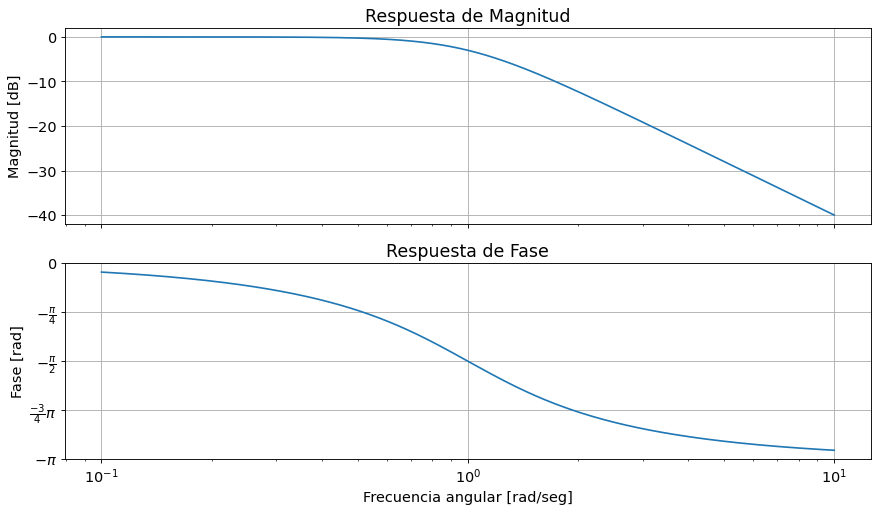

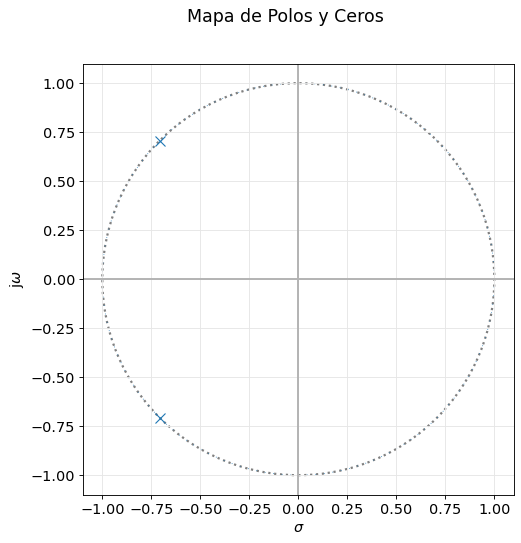

In [5]:
_, axes_hdl = bodePlot(H1)

plt.sca(axes_hdl[0])

pzmap(H1)

# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.
# analyze_sys(H1, sys_name='mi ejemplo')



otra manera de llegar al mismo resultado, con un poco más de detalle es a través de la función *analyze_sys*

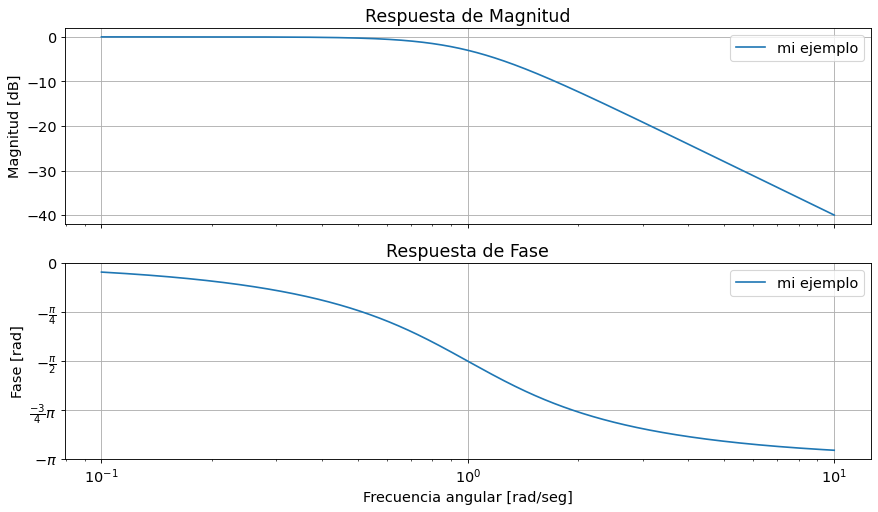

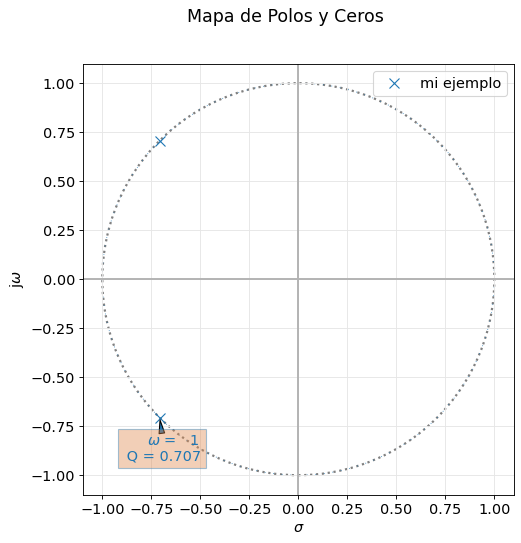

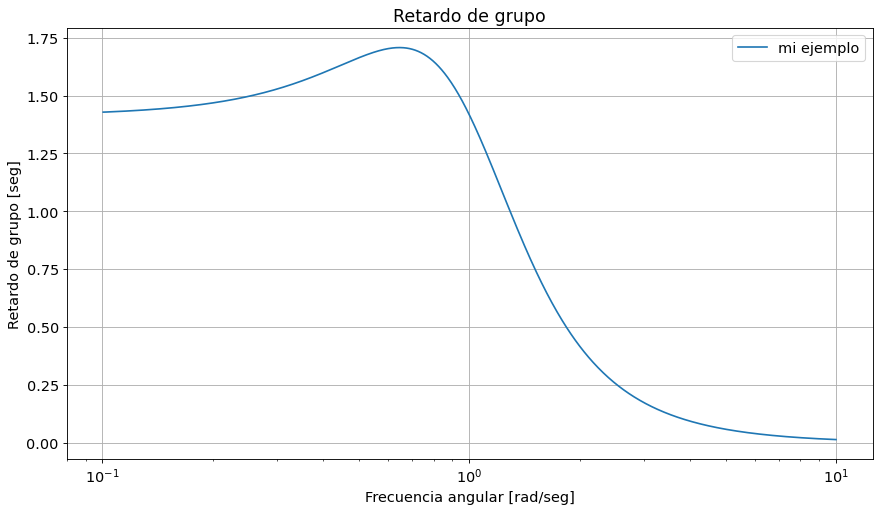

In [8]:
# Otra forma de analizar el sistema H1, con una función
# de más alto nivel. Podés probarlo si te interesa.

# el caracter "_" descarta la salida de la función
_ = analyze_sys([H1], sys_name='mi ejemplo')



ciertamente *analyze_sys* extiende el análisis de la respuesta en frecuencia al calcular el *retardo de grupo*; como también incorpora información al *diagrama de polos y ceros*, acerca del  $\omega_0$ y $Q$ asociado a cada singularidad (polo o cero) o par de singularidades complejas conjugadas. Se sugiere el uso de *analyze_sys* y será la **función de referencia de ahora en adelante**.

### Simulación Circuital

La simulación circuital se realizará con el software gratuito [LTspice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html). Para ello hay que dibujar el siguiente circuito:

![SOS_pasabajo_simple_circ.png](SOS_pasabajo_simple_circ.png)

Ejecutar el análisis de *AC sweep* configurado como se observa en la directiva *AC* visible en el circuito, e indicar que calcule la transferencia $V_2/V_1$

![SOS_pasabajo_simple_resp_frec.png](SOS_pasabajo_simple_resp_frec.png)

Como se puede observar, los resultados de la simulación circuital **coinciden** con la numérica. Recordar que en *LTspice* la respuesta en frecuencia es respecto a la frecuencia $f$, medida en (Hz), y no a la pulsación angular $\omega$ medida en radianes por segundo. Su relación es $\omega = 2.\pi. f$, y en consecuencia 1 r/s se corresponde con $1/(2\pi)$ Hz. 

Esto es evidencia suficiente para proceder a la siguiente instancia de diseño, que consiste en realizar un prototipo circuital, analizar las limitaciones prácticas de la implementación. Proceder al eventual rediseño, simulación y finalmente continuar con el diseño final y fabricación del circuito final.

## Apéndice

### Dibujo de circuitos

Finalmente se presenta una alternativa para el dibujo de circuitos eléctricos a partir de la propia librería **pyTC2**, que actúa como intérprete del módulo [schemdraw](https://schemdraw.readthedocs.io/en/latest/). La idea es dibujar la red de izquierda a derecha secuencialmente desde el generador $V_i$ hasta el puerto de salida $V_o$:

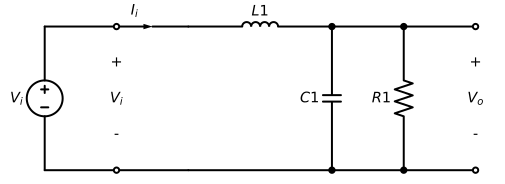

In [7]:
from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex

d = Drawing(unit=4)
d = dibujar_elemento_derivacion(d, "V",  with_nodes=False, sym_label="V_i")
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_entrada(d, voltage_lbl=('+', to_latex('V_i'), '-'), current_lbl=to_latex('I_i'))
d = dibujar_elemento_serie(d, "L", sym_label="L1")
d = dibujar_elemento_derivacion(d, "C", sym_label="C1")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "R", sym_label="R1")
d = dibujar_puerto_salida(d, voltage_lbl=('+', to_latex('V_o'), '-'))
display(d)
